# Non-linear Regression in Law

<div style="text-align: right">Versão 2023-05-10</div>

## **André Lage-Freitas** 
- **Associate Professor** at Universidade Federal de Alagoas (UFAL)
- **PhD in Computer Science** from the [_Institut National des Sciences Appliquées de Rennes_ (France)](https://www.insa-rennes.fr/)
- Author of the paper [Predicting Brazilian Court Decisions](https://doi.org/10.7717/peerj-cs.904).
  - Lage-Freitas, André, Héctor Allende-Cid, Orivaldo Santana, and Lívia Oliveira-Lage. 2022. “Predicting Brazilian Court Decisions.” PeerJ Computer Science 8 (March): e904. 2022.
- [Follow on LinkedIn](www.linkedin.com/comm/mynetwork/discovery-see-all?usecase=PEOPLE_FOLLOWS&followMember=lage), [Follow on YouTube](https://www.youtube.com/channel/UCLPXTzvZ8IFrU6hBTeo1C-Q)


## Introduction

In this notebook, we will introduce non-linear regression and its applications in law. We will create a hypothetical dataset and explore various non-linear regression models using Python.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
sns.set()


## Creating a Hypothetical Dataset: Modeling the Problem

### Goal

The overall goal is **to understand the relationship between the years since a law was passed (or the number of cases) and the case outcome aspects**. In this context, case outcome is a hypothetical variable that represents the results or consequences of legal cases over time since the law was passed. This variable could encompass various aspects, such as the number of cases won or lost, monetary settlements, or any other measure that could quantify the outcomes of legal cases. 

> _**Disclaimer**: in this example, we use case outcomes for the sake of explanation. Choosing the right features (variables) and the right machine learning models to predict case outcome requires further statistical analysis and modeling such as described in the paper [Lage-Freitas, André, Héctor Allende-Cid, Orivaldo Santana, and Lívia Oliveira-Lage. 2022. “Predicting Brazilian Court Decisions.” PeerJ Computer Science 8 (March): e904. 2022](https://doi.org/10.7717/peerj-cs.904)._


So we create a dataset to simulate a situation where the relationship between the years since a law was passed (or the number of cases) and the case outcomes is non-linear. By generating synthetic data with a non-linear relationship, one can practice and explore the application of non-linear regression techniques in the legal domain. In this specific dataset, the number of legal cases increases linearly with the years since the law was passed, while the case outcomes have a quadratic relationship with the years since the law was passed.



In [3]:
np.random.seed(42)

n_samples = 1000
years_since_law_passed = np.random.uniform(0, 10, size=n_samples)
legal_cases = 100 * years_since_law_passed + np.random.normal(0, 10, size=n_samples)
case_outcomes = 50 * years_since_law_passed ** 2 + np.random.normal(0, 50, size=n_samples)

data = pd.DataFrame({'Years Since Law Passed': years_since_law_passed, 
                     'Number of Legal Cases': legal_cases, 
                     'Case Outcomes': case_outcomes})
data.head()

,Years Since Law Passed,Number of Legal Cases,Case Outcomes
0,3.745401,376.317129,631.085630
1,9.507143,937.360863,4515.133183
2,7.319939,735.795920,2603.839636
3,5.986585,604.764342,1829.962702
4,1.560186,161.616545,125.831068




### Understaning the Dataset

This code generates a synthetic dataset for the purpose of demonstrating non-linear regression techniques in the context of law as described next:

1. `np.random.seed(42)` sets the random seed to ensure that the same random numbers are generated each time the code is run. This makes the results reproducible.
 
2. `n_samples = 1000` defines the number of samples (rows) in the dataset.

3. `years_since_law_passed` represents the years since a hypothetical law was passed.

4. `legal_cases` represents the number of legal cases. It is calculated as 100 times the years since the law passed plus some random noise generated from a normal distribution with a mean of 0 and standard deviation of 30.

5. `case_outcomes` represents the outcomes of the legal cases such as the length of a sentence, the amount of damages awarded in a civil case, or the success rate of a particular legal strategy. It represents a hypothetical measure of the outcome or impact of each legal case.

6. `data` is a pandas DataFrame created from the numpy arrays `years_since_law_passed`, `legal_cases`, and `case_outcomes`. It has three columns: 'Years Since Law Passed', 'Legal Cases', and 'Case Outcomes'.

7. `data.head()` displays the first 5 rows of the dataset.


## Exploratory Data Analysis and Visualization

Let's perform exploratory data analysis and create visualizations to understand the relationships between variables in the dataset.

In [4]:
data.describe()

,Years Since Law Passed,Number of Legal Cases,Case Outcomes
count,1000.000000,1000.000000,1000.000000
mean,4.902566,491.245511,1628.742909
std,2.921374,291.852423,1500.905073
min,0.046320,-3.312075,-149.781073
25%,2.359733,234.171300,277.071935
50%,4.968074,499.715475,1239.454320
75%,7.443196,741.545365,2785.441238
max,9.997177,1010.538913,5086.937699


### Interpreting the Result

**Remark**: if you run the cell above again, you will get dofferent results but they should be similar!

The output of the `data.describe()` function presents a summary statistics table for the dataset. The table provides an overview of the distribution, central tendency, and dispersion for each column. The columns are 'Years Since Law Passed', 'Number of Legal Cases', and 'Case Outcomes'. Here's a brief explanation of the output:

- `count`: This row shows the number of non-missing (non-NA/null) values for each column, which is 1000 for all columns.
- `mean`: This row displays the mean (average) value for each column. For example, the average 'Years Since Law Passed' is 4.902566, the average 'Legal Cases' is 493.223428, and the average 'Case Outcomes' is 1641.871874.
- `std`: This row represents the standard deviation for each column, which measures the dispersion or spread of the values.
- `min`: This row contains the minimum value for each column.
- `25%`: This row displays the 25th percentile value for each column, which is the value below which 25% of the data falls.
- `50%`: This row represents the median (50th percentile) value for each column, which is the value below which 50% of the data falls.
- `75%`: This row shows the 75th percentile value for each column, which is the value below which 75% of the data falls.
- `max`: This row contains the maximum value for each column.

By examining the summary statistics, you can gain insights into the dataset's distribution and identify any potential outliers or data entry errors.


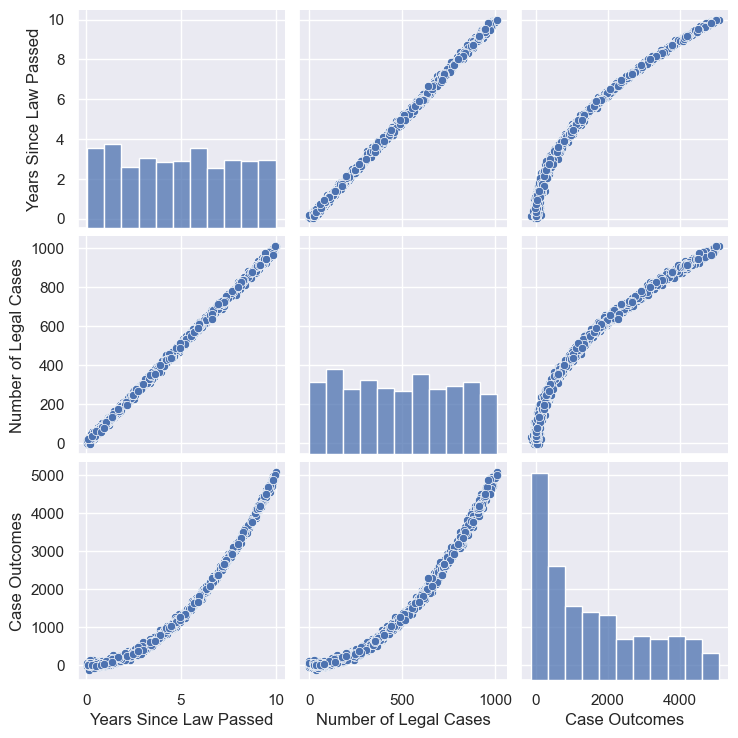

In [5]:
sns.pairplot(data)

### Interpreting the Plot

The `sns.pairplot(data)` function creates a pair plot for the dataset. A pair plot is a grid of scatter plots that display the relationships between pairs of variables in the dataset. In this case, the dataset has three variables: 'Years Since Law Passed', 'Number of Legal Cases', and 'Case Outcomes'.

The pair plot helps **visualize the relationships between the variables and can reveal trends, correlations, or patterns**:

- Along the diagonal, you can find histograms for each variable, providing insights into the distribution of each variable. 
- The off-diagonal scatter plots show the relationships between pairs of variables, allowing you to assess if there is a linear or non-linear relationship between them.

The pair plot helps you visually explore the dataset before applying any regression model, such as Decision Tree, Random Forest, and Support Vector Machine regressinos. By observing the scatter plots in the pair plot, you can identify whether the relationships between variables are linear or non-linear, or if there are any patterns or trends in the data. Having a better understanding of these relationships can inform your decisions about which regression models to apply. 

For instance, **if you observe a clear non-linear relationship between variables, you may decide to apply non-linear regression models, such as Decision Tree, Random Forest, or Support Vector Machines (SVM)**, which can better capture the non-linear nature of the data. Conversely, **if the relationship appears linear, you might choose a linear regression model**.

The main idea is that the pair plot provides visual insights into the data, helping you make informed decisions about which regression models are best suited to model the relationships between variables in the dataset. Therefore, based on the plots, we **chose a non-linear regression model to predict case outcome by using the number of cases and the years since the law passed**.

## Data Splitting

Let's now define the dependent and independent variables and prepare the data for a regression model by splitting it into training and testing sets. 

- The independent variables, `Years Since Law Passed` and `Number of Legal Cases`, are represented by `X`.
- The dependent variable, `Case Outcomes`, is represented by `y`. 
- The `train_test_split` function is then used to split the data into training and testing sets, with 20% of the data allocated to the testing set. 
- The `random_state` parameter is set to 42 to ensure that the split approximately is the same each time the code is run. 
- Finally, the split data is assigned to the variables `X_train`, `X_test`, `y_train`, and `y_test`.

In [83]:
X = data[['Years Since Law Passed', 'Number of Legal Cases']]
y = data['Case Outcomes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### The Evaluatin Metrics

**MSE (Mean Squared Error)** and **R-squared score** are measures of how well a predictive model performs.

1. MSE: A measure of the average difference between the model's predictions and the actual outcomes, squared. Smaller MSE means better accuracy, as the predictions are closer to the actual values.

2. R-squared score: A measure of how much the model's predictions explain the variation in the actual outcomes. Ranges from 0 to 1, with 1 being a perfect fit. A higher R-squared score means the model explains a larger portion of the variation. For example, if the R-squared score is 0.65306, which means that approximately 65.3% of the variation in the Case Outcomes can be explained by the independent variables.



## Decision Tree Regression

A Decision Tree regression model is a tool used to predict outcomes based on certain input factors. It works by breaking down complex decisions into simpler ones, like a flowchart. For each input factor, the model splits the data into groups that best predict the outcome. This process repeats until the model reaches a satisfactory level of accuracy. The resulting tree-like structure helps to predict the outcome of new cases based on the input factors.

Mean Squared Error: 1125465.0519811593
R-squared Score: 0.5867406058739102


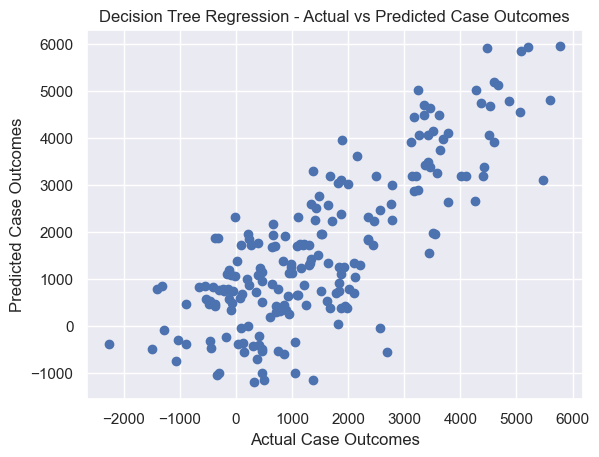

In [90]:

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Case Outcomes')
plt.ylabel('Predicted Case Outcomes')
plt.title('Decision Tree Regression - Actual vs Predicted Case Outcomes')
plt.show()


### Interpreting the Results

The plot visually compares the actual case outcomes (x-axis) to the predicted case outcomes (y-axis). If the points were close to a straight diagonal line, it would mean the predictions are accurate.

The MSE value of 1125465.05 indicates the average difference between the actual and predicted case outcomes, squared. A smaller number means better accuracy.

The R-squared Score value of 0.5867 shows how well the model's predictions explain the variation in the actual case outcomes. Here, the model explains about 58.67% of the variation.


## Random Forest Regression

Next, we will try the Random Forest Regression model, which is an ensemble learning method. It builds multiple decision trees and merges their results to improve the overall performance and control overfitting.

The Random Forest Regression model is a more advanced non-linear regression method. This model can potentially provide better results than the previously used Decision Tree Regression. By comparing the performance metrics and plots of both models, you can discuss the differences and advantages of each method in the context of law.


Mean Squared Error: 654048.4100816223
R-squared Score: 0.759840033056852


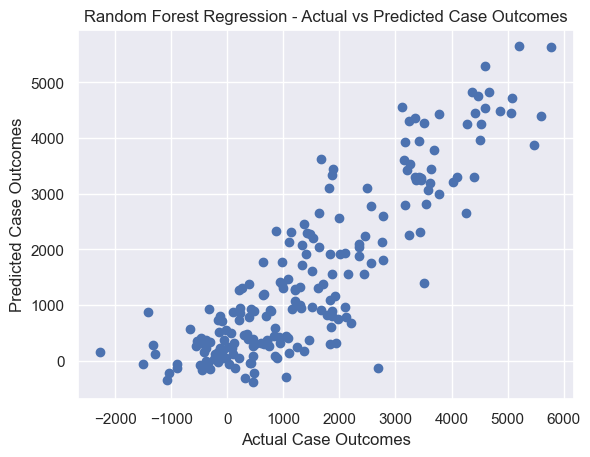

In [92]:
# Fitting the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Calculating the mean squared error and R-squared score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared Score: {r2_rf}")

# Plotting the actual vs predicted case outcomes
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Case Outcomes')
plt.ylabel('Predicted Case Outcomes')
plt.title('Random Forest Regression - Actual vs Predicted Case Outcomes')
plt.show()


### Interpreting the Results

Take it as an exercise and make your own conclusions :-)


## Support Vector Regression

Another type of non-linear regression we can explore is Support Vector Regression (SVR). It is based on the Support Vector Machine (SVM) algorithm, which is widely used for classification tasks. SVR is its adaptation for regression problems.

Support Vector Regression is another powerful non-linear regression technique. Similar to the previous sections, we fit the model, make predictions, calculate performance metrics, and visualize the results.

Mean Squared Error: 561528.4211828234
R-squared Score: 0.7938124380547376


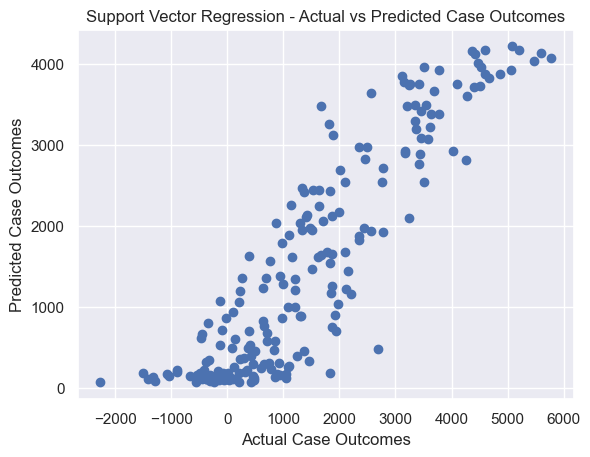

In [93]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Fitting the Support Vector Regression model
svr_regressor = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1))
svr_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred_svr = svr_regressor.predict(X_test)

# Calculating the mean squared error and R-squared score
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Mean Squared Error: {mse_svr}")
print(f"R-squared Score: {r2_svr}")

# Plotting the actual vs predicted case outcomes
plt.scatter(y_test, y_pred_svr)
plt.xlabel('Actual Case Outcomes')
plt.ylabel('Predicted Case Outcomes')
plt.title('Support Vector Regression - Actual vs Predicted Case Outcomes')
plt.show()

### Interpreting the Results

Take it as an exercise and make your own conclusions :-)

## Exercise

1. Compare the results of Decision Tree Regression, Random Forest Regression, and Support Vector Regression we got in the previous examples.
2. Choose a model and explain the reason you chose it.
3. Use another dataset and use the regression models to it (you may create another hypothetical dataset).
4. Discuss the results of Decision Tree Regression, Random Forest Regression, and Support Vector Regression for you dataset.

In [31]:
# TODO